<a href="https://colab.research.google.com/github/Sarrtt303/DR_python/blob/main/code1(RestNet15_and_densenet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

In [ ]:
file_path = '/content/drive/MyDrive/aptos2019/train_1.csv'
df = pd.read_csv(file_path)

In [ ]:
folder_path = '/content/drive/MyDrive/aptos2019/train_images/train_images'
image_pattern = '*.png'
image_files = glob.glob(os.path.join(folder_path, image_pattern))

Path Validation Test

(2136, 3216, 3)


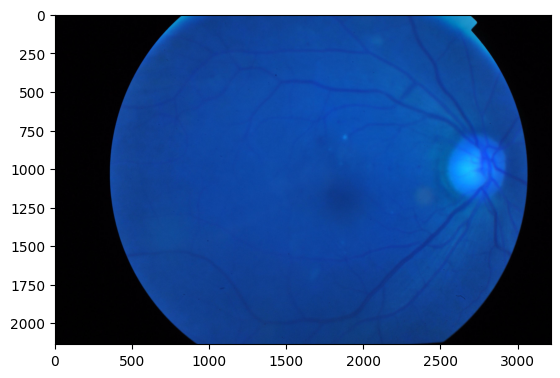

In [ ]:
img = cv2.imread('/content/drive/MyDrive/aptos2019/train_images/train_images/1ae8c165fd53.png')
print(img.shape)
plt.imshow(img)

Resizing the Images

In [ ]:
data = []
labels = []

image_size=(128,128)
for index, row in df.iterrows():
    image_path = f"/content/drive/MyDrive/aptos2019/train_images/train_images/{row['id_code']}.png"
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)
    data.append(image)
    labels.append(row['diagnosis'])
    if index < 10:
      plt.imshow(image)
      plt.show()

Processing images:   1%|          | 30/2930 [00:43<55:14,  1.14s/it]  

In [ ]:
X_train = np.array(data)
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
y_train = np.array(labels, dtype=np.int32)

print(X_train.shape)
print(y_train.shape)

(2930, 128, 128, 3)
(2930,)


In [ ]:
print(y_train)


[2 1 4 ... 0 0 0]


Pretrained Model Loading

In [ ]:
from tensorflow.keras.applications import VGG16,MobileNetV2,InceptionV3,DenseNet121,ResNet50,ResNet101

In [ ]:
base_model = ResNet50(input_shape=(128,128,3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.layers import Flatten,Dense

new_model=base_model.get_layer('conv5_block3_out').output #last layer of your pretrained model
output1=Flatten()(new_model)
output=Dense(units=512,activation='relu')(output1)
output=Dense(units=5, activation='softmax')(output)

In [ ]:
from tensorflow.keras.models import Model
model = Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 40,368,005 (153.99 MB)

 Trainable params: 16,780,293 (64.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

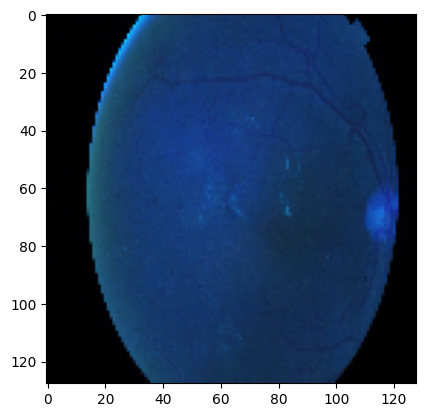

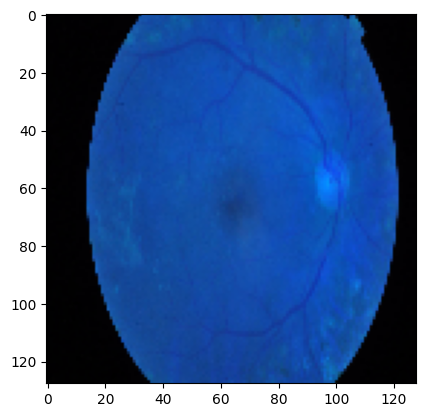

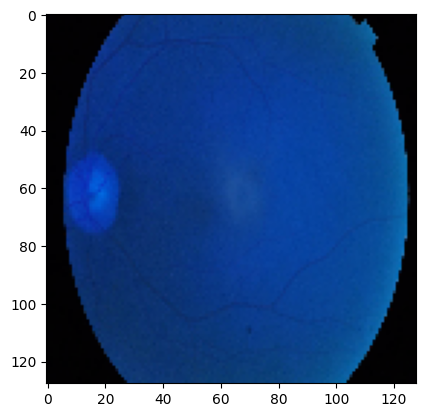

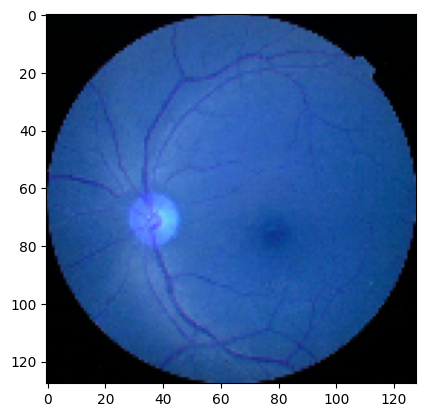

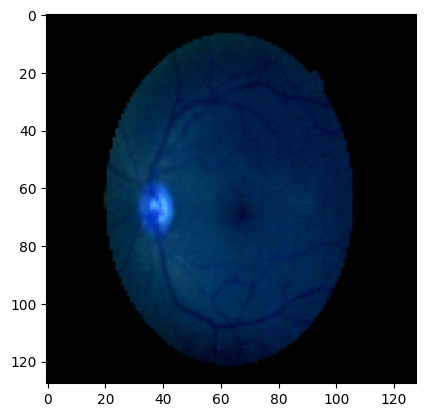

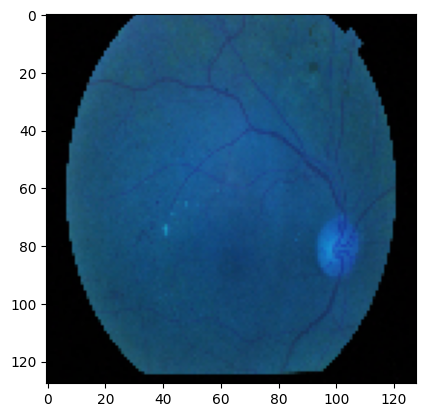

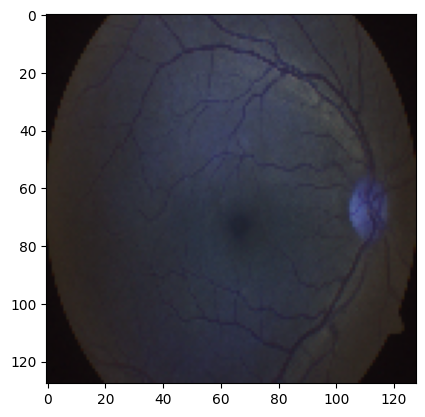

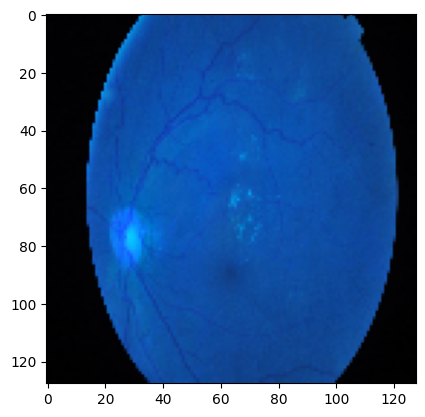

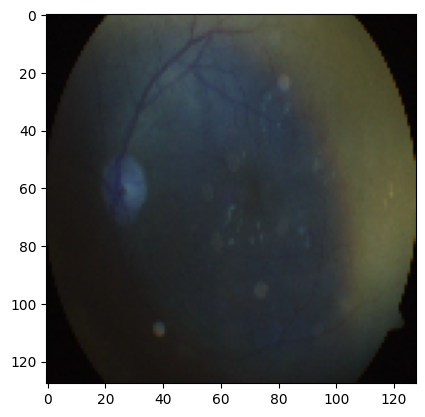

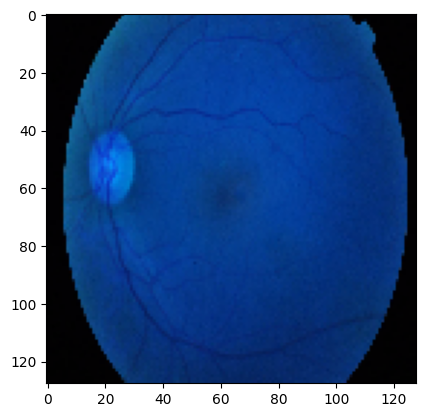

In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/aptos2019/valid.csv')

val_data = []
val_labels = []

image_size = (128,128)

for index, row in val_df.iterrows():
    image_path = f"/content/drive/MyDrive/aptos2019/val_images/val_images/{row['id_code']}.png"
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)
    val_data.append(image)
    val_labels.append(row['diagnosis'])
    if index < 10:
      plt.imshow(image)
      plt.show()

In [ ]:
X_val = np.array(val_data)
X_val = (X_val - np.min(X_val)) / (np.max(X_val) - np.min(X_val)).astype(np.float32)
y_val = np.array(val_labels, dtype=np.int32)

print(X_val.shape)
print(y_val.shape)

(366, 128, 128, 3)
(366,)


In [ ]:
print(y_val)

[2 4 1 0 0 4 0 2 2 1 0 2 0 3 1 0 2 0 0 2 2 0 1 2 0 2 0 0 0 0 0 0 4 2 4 2 0
 0 4 0 4 2 2 4 2 1 2 4 0 3 1 2 2 2 2 0 3 0 2 1 0 2 0 0 0 0 2 2 0 0 0 1 1 0
 3 0 2 0 2 0 1 3 1 0 2 0 0 3 4 2 2 0 0 0 0 1 0 3 1 0 2 2 0 0 0 4 4 0 0 1 2
 4 0 0 2 0 0 0 0 0 3 0 2 2 0 0 4 0 0 1 0 2 0 2 2 2 1 0 0 1 0 0 0 2 0 2 1 4
 0 2 0 2 0 0 0 0 0 0 4 2 0 0 2 2 2 3 2 0 3 0 0 0 0 4 0 2 0 1 0 0 0 2 0 0 0
 0 2 0 1 3 1 0 4 0 0 2 4 0 1 0 3 0 2 2 0 1 0 3 3 1 2 0 0 2 2 0 2 0 0 2 1 0
 0 1 0 0 0 2 2 0 1 0 4 1 1 2 4 2 2 2 0 2 0 2 0 2 2 0 0 0 0 1 1 2 0 2 0 2 1
 0 0 0 2 0 2 2 2 2 0 2 2 2 0 3 2 0 0 0 0 2 2 0 2 2 0 3 0 1 2 0 4 3 0 0 0 0
 3 2 0 4 0 0 0 4 3 4 2 1 0 2 0 0 0 0 0 2 1 0 2 2 2 0 0 0 0 4 0 2 0 0 2 1 0
 0 0 0 2 2 0 2 2 3 0 3 2 1 0 2 2 1 0 0 1 4 1 0 0 2 0 2 4 4 3 0 2 0]


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=25, batch_size=16)

Epoch 1/25
184/184 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.6530 - loss: 0.9732 - val_accuracy: 0.5956 - val_loss: 0.9586
Epoch 2/25
184/184 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.6726 - loss: 0.9163 - val_accuracy: 0.6995 - val_loss: 0.8455
Epoch 3/25
184/184 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.6598 - loss: 0.9213 - val_accuracy: 0.6257 - val_loss: 0.9313
Epoch 4/25
184/184 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.6824 - loss: 0.8723 - val_accuracy: 0.6448 - val_loss: 0.8873
Epoch 5/25
184/184 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.6861 - loss: 0.8704 - val_accuracy: 0.6858 - val_loss: 0.8572
Epoch 6/25
184/184 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.6748 - loss: 0.8882 - val_accuracy: 0.6339 - val_loss: 0.9115
Epoch 7/25
184/184 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.6937 - loss: 0.8629 - val_accuracy: 0.6858 - val_loss: 0.8165
Epoch 8/25
184/184 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.7083 - loss: 0.8121 - val_accu

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/aptos2019/test.csv')

test_data = []
test_labels = []

image_size = (128,128)

for index, row in test_df.iterrows():
    image_path = f"/content/drive/MyDrive/aptos2019/test_images/test_images/{row['id_code']}.png"
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)
    test_data.append(image)
    test_labels.append(row['diagnosis'])






In [ ]:
X_test = np.array(test_data)
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test)).astype(np.float32)
y_test = np.array(test_labels, dtype=np.int32)

print(X_test.shape)
print(y_test.shape)

(14, 128, 128, 3)
(14,)


In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step - accuracy: 0.0714 - loss: 19.7448
Test loss: 19.7448
Test accuracy: 0.0714


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Classification Report:
                   precision    recall  f1-score   support

           No DR       0.00      0.00      0.00         7
         Mild DR       0.00      0.00      0.00         2
     Moderate DR       0.10      0.33      0.15         3
       Severe DR       0.00      0.00      0.00         1
Proliferative DR       0.00      0.00      0.00         1

        accuracy                           0.07        14
       macro avg       0.02      0.07      0.03        14
    weighted avg       0.02      0.07      0.03        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


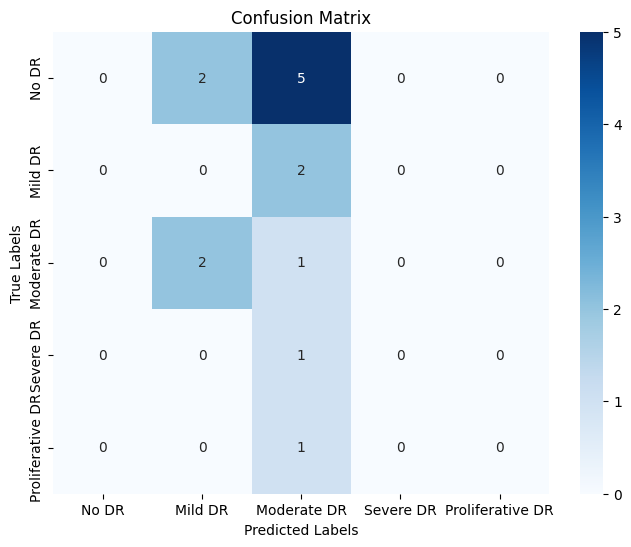

In [ ]:
# Convert true labels to one-hot encoded format
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=5)

# Get the true labels and predicted probabilities for the validation data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the classification report
class_names = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']
report = classification_report(np.argmax(y_test_oh, axis=1), predicted_classes, target_names=class_names)
print("Classification Report:\n", report)

# Generate the confusion matrix
cm = confusion_matrix(np.argmax(y_test_oh, axis=1), predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow.keras as keras

# Assuming you have already trained your model and have a trained model object named 'model'

# Save the model using save_model
model.save('efficientnetb4.keras')



<ipython-input-30-5aba05e6a736>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.argmax(y_train_onehot, axis=1), palette="viridis")


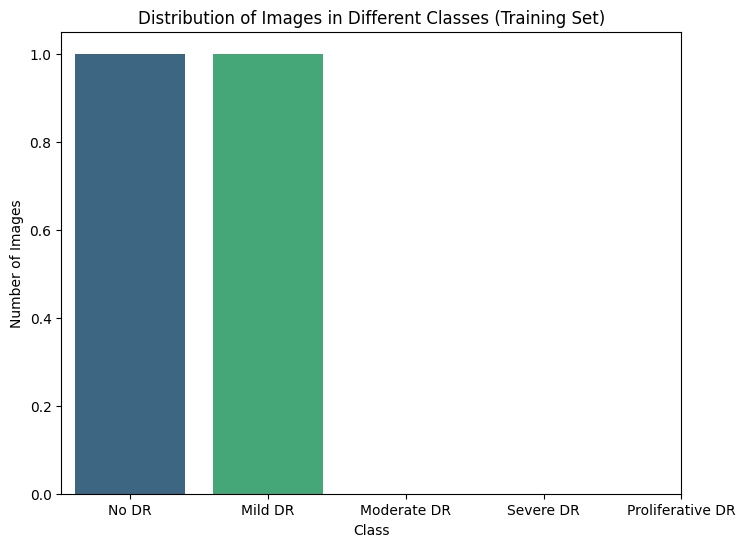

In [ ]:
# train data

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Convert true labels to one-hot encoded format
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=5)

# Plot the distribution of images in different classes for the training set
plt.figure(figsize=(8, 6))
sns.countplot(x=np.argmax(y_train_onehot, axis=1), palette="viridis")
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Different Classes (Training Set)')
plt.xticks(ticks=range(5), labels=['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR'])
plt.show()

<ipython-input-31-807023d780ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.argmax(y_val_onehot, axis=1), palette="viridis")


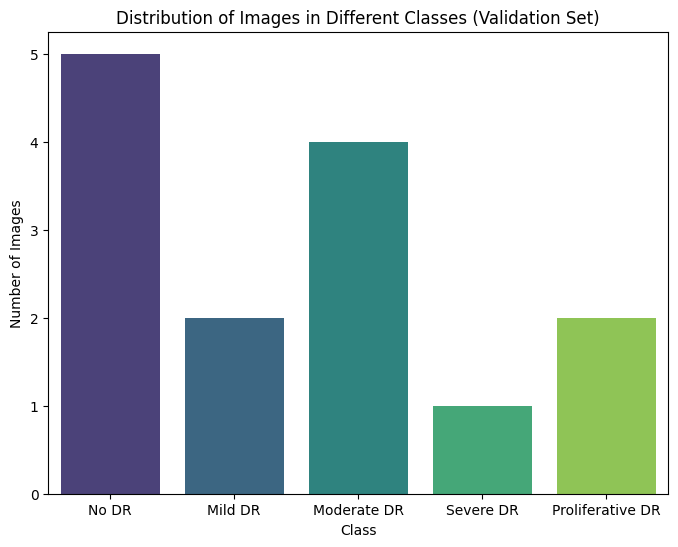

In [ ]:
#val data

y_val_onehot = tf.keras.utils.to_categorical(y_val, num_classes=5)

plt.figure(figsize=(8, 6))
sns.countplot(x=np.argmax(y_val_onehot, axis=1), palette="viridis")
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Different Classes (Validation Set)')
plt.xticks(ticks=range(5), labels=['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR'])
plt.show()

<ipython-input-32-aa8701bb4807>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.argmax(y_test_onehot, axis=1), palette="viridis")


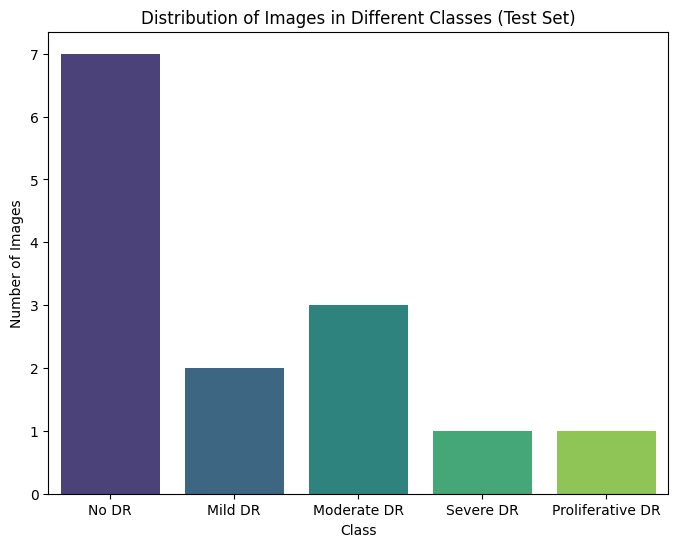

In [ ]:
#test data

y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=5)

plt.figure(figsize=(8, 6))
sns.countplot(x=np.argmax(y_test_onehot, axis=1), palette="viridis")
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Different Classes (Test Set)')
plt.xticks(ticks=range(5), labels=['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR'])
plt.show()